In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/light-theme-and-dark-theme-case-study/website_ab_test.csv


#Bounce Rate is defined as the percentage of visitors that leave a webpage without taking an action, such as clicking on a link, filling out a form, or making a purchase.
#CTR is the number of clicks that your ad receives divided by the number of times your ad is shown

**Theme**: dark or light
**Click** Through Rate: The proportion of the users who click on links or buttons on the website.
**Conversion Rate:** The percentage of users who signed up on the platform after visiting for the first time.
**Bounce Rate:** The percentage of users who leave the website without further interaction after visiting a single page.
**Scroll Depth:** The depth to which users scroll through the website pages.
**Age:** The age of the user.
**Location**: The location of the user.
**Session Duration:** The duration of the user’s session on the website.
**Purchases**: Whether the user purchased the book (Yes/No).
* **Added_to_Cart:** Whether the user added books to the cart (Yes/No).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df=pd.read_csv('/kaggle/input/light-theme-and-dark-theme-case-study/website_ab_test.csv')
df

,Theme,Click Through Rate,Conversion Rate,Bounce Rate,Scroll_Depth,Age,Location,Session_Duration,Purchases,Added_to_Cart
0,Light Theme,0.054920,0.282367,0.405085,72.489458,25,Chennai,1535,No,Yes
1,Light Theme,0.113932,0.032973,0.732759,61.858568,19,Pune,303,No,Yes
2,Dark Theme,0.323352,0.178763,0.296543,45.737376,47,Chennai,563,Yes,Yes
3,Light Theme,0.485836,0.325225,0.245001,76.305298,58,Pune,385,Yes,No
4,Light Theme,0.034783,0.196766,0.765100,48.927407,25,New Delhi,1437,No,No
...,...,...,...,...,...,...,...,...,...,...
995,Dark Theme,0.282792,0.401605,0.200720,68.478822,25,Kolkata,321,Yes,Yes
996,Dark Theme,0.299917,0.026372,0.762641,73.019821,38,Chennai,1635,Yes,Yes
997,Light Theme,0.370254,0.019838,0.607136,33.963298,32,Bangalore,1237,No,Yes
998,Light Theme,0.095815,0.137953,0.458898,37.429284,24,Chennai,893,Yes,No


In [4]:
df.isnull().sum()

Theme                 0
Click Through Rate    0
Conversion Rate       0
Bounce Rate           0
Scroll_Depth          0
Age                   0
Location              0
Session_Duration      0
Purchases             0
Added_to_Cart         0
dtype: int64

In [5]:
df.describe()

,Click Through Rate,Conversion Rate,Bounce Rate,Scroll_Depth,Age,Session_Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.256048,0.253312,0.505758,50.319494,41.528000,924.999000
std,0.139265,0.139092,0.172195,16.895269,14.114334,508.231723
min,0.010767,0.010881,0.200720,20.011738,18.000000,38.000000
25%,0.140794,0.131564,0.353609,35.655167,29.000000,466.500000
50%,0.253715,0.252823,0.514049,51.130712,42.000000,931.000000
75%,0.370674,0.373040,0.648557,64.666258,54.000000,1375.250000
max,0.499989,0.498916,0.799658,79.997108,65.000000,1797.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Theme               1000 non-null   object 
 1   Click Through Rate  1000 non-null   float64
 2   Conversion Rate     1000 non-null   float64
 3   Bounce Rate         1000 non-null   float64
 4   Scroll_Depth        1000 non-null   float64
 5   Age                 1000 non-null   int64  
 6   Location            1000 non-null   object 
 7   Session_Duration    1000 non-null   int64  
 8   Purchases           1000 non-null   object 
 9   Added_to_Cart       1000 non-null   object 
dtypes: float64(4), int64(2), object(4)
memory usage: 78.2+ KB


In [7]:
df.head()

,Theme,Click Through Rate,Conversion Rate,Bounce Rate,Scroll_Depth,Age,Location,Session_Duration,Purchases,Added_to_Cart
0,Light Theme,0.054920,0.282367,0.405085,72.489458,25,Chennai,1535,No,Yes
1,Light Theme,0.113932,0.032973,0.732759,61.858568,19,Pune,303,No,Yes
2,Dark Theme,0.323352,0.178763,0.296543,45.737376,47,Chennai,563,Yes,Yes
3,Light Theme,0.485836,0.325225,0.245001,76.305298,58,Pune,385,Yes,No
4,Light Theme,0.034783,0.196766,0.765100,48.927407,25,New Delhi,1437,No,No


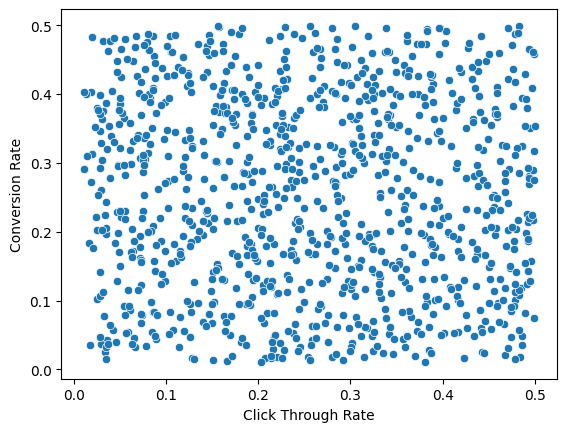

In [8]:
s=sns.scatterplot(data=df,x='Click Through Rate',y='Conversion Rate')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Axes: xlabel='Click Through Rate', ylabel='Count'>

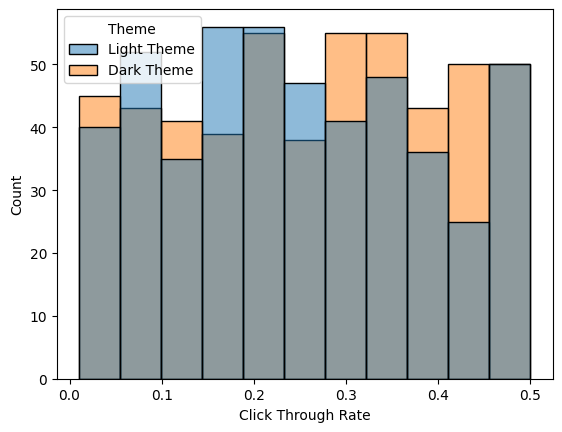

In [9]:
sns.histplot(data=df,x='Click Through Rate', hue='Theme')

<Axes: xlabel='Scroll_Depth', ylabel='Bounce Rate'>

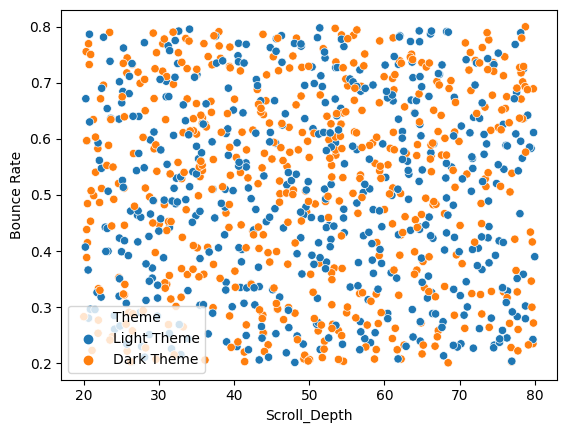

In [10]:
sns.scatterplot(data=df,x='Scroll_Depth',y='Bounce Rate',hue='Theme')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


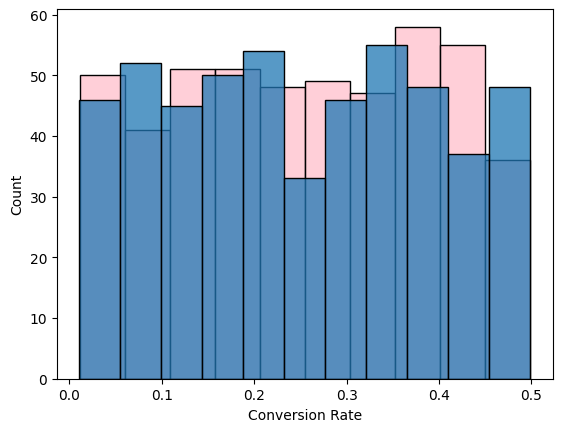

In [11]:
l=df[df['Theme']=='Light Theme']
d=df[df['Theme']=='Dark Theme']
s1=sns.histplot(data=l,x='Conversion Rate',color='pink')
s2=sns.histplot(data=d,x='Conversion Rate')

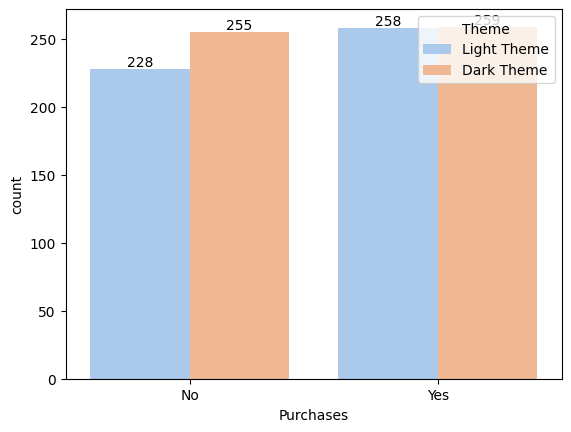

In [12]:
ax=sns.countplot(data=df,x='Purchases',hue='Theme',palette='pastel')
for i in ax.containers:
    ax.bar_label(i,)

<Axes: xlabel='Age', ylabel='Session_Duration'>

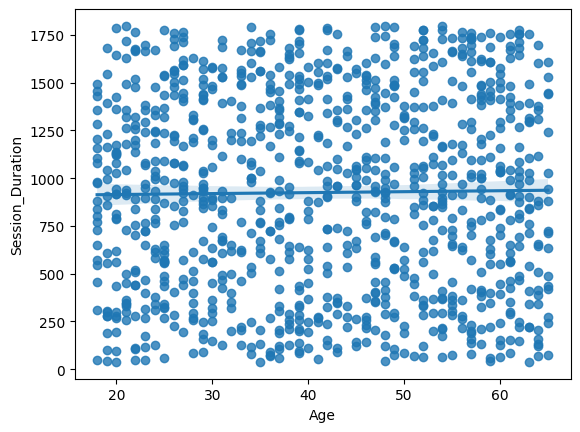

In [13]:
sns.regplot(data=df,x='Age',y='Session_Duration')

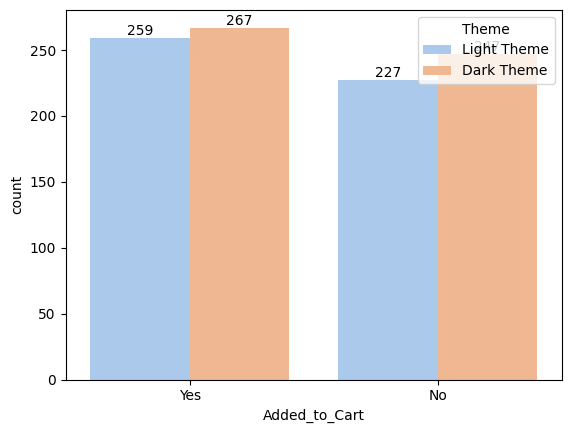

In [14]:
ax=sns.countplot(data=df,x='Added_to_Cart',hue='Theme',palette='pastel')
for i in ax.containers:
    ax.bar_label(i,)

In [15]:
#The null hypothesis is the default assumption that there is no effect or no difference between groups. 
#The alternative hypothesis is what you aim to support, suggesting that there is an effect or a difference between groups

In [16]:
import scipy.stats as stats
conversion_rates_light = df[df['Theme'] == 'Light Theme']['Conversion Rate']
conversion_rates_dark = df[df['Theme'] == 'Dark Theme']['Conversion Rate']
t_stat,p_value=stats.ttest_ind(a=conversion_rates_light, b=conversion_rates_dark, equal_var=True)
print(t_stat)
print(p_value)

# performing a two-sample t-test



0.4744928265361651
0.6352523154387317


Since the p-value is much greater than the typical significance level of 0.05, we do not have enough evidence to reject the null hypothesis. It means that the observed difference in average session duration between the two themes is not statistically significant.results indicate that the average session duration for both themes is similar, and any differences observed may be due to chance.